<a href="https://colab.research.google.com/github/UJWAL-SHAH/NLP-Lab/blob/main/NLP_Lab5_SMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This is Lab No: 5 of Ujwal Shah (Roll No: J078)

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
x=pd.read_csv('/content/spam.csv',encoding='latin-1',usecols=['v1','v2'])
x.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [91]:
type(x)

pandas.core.frame.DataFrame

In [92]:
x.isnull().sum()

v1    0
v2    0
dtype: int64

In [93]:
x['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [94]:
import nltk as nltk
import gensim as gs
import spacy as sp
import textblob as tb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [95]:
from string import punctuation
from nltk.corpus import stopwords
#TO remove stopwords and punctuations
stuff_to_be_removed = list(stopwords.words('english'))+list(punctuation)
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
#Defining Stemmer
stemmer = LancasterStemmer()

In [96]:
#Defining corpus
corpus = x['v2'].tolist()
len(corpus)

5572

In [97]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x['v1'] = le.fit_transform(x['v1'])

In [98]:
value_counts = x['v1'].value_counts()
value_counts

0    4825
1     747
Name: v1, dtype: int64

In [99]:
final_corpus = []
for i in range(len(corpus)):
  word = word_tokenize(corpus[i].lower()) #convert to lower casse and  then send to word_tokenize
  #Check if word in stuff_to_removed and if not then stemmetize it
  word = [stemmer.stem(y) for y in word if y not in stuff_to_be_removed]
  #Put space between each word
  j = " ".join(word)
  final_corpus.append(j)
final_corpus

['go jurong point crazy.. avail bug n gre world la e buffet ... cin got am wat ...',
 'ok lar ... jok wif u on ...',
 "fre entry 2 wkly comp win fa cup fin tkts 21st may 2005. text fa 87121 receiv entry quest std txt rat c 's apply 08452810075over18 's",
 'u dun say ear hor ... u c already say ...',
 "nah n't think goe usf liv around though",
 "freemsg hey darl 's 3 week 's word back 'd lik fun stil tb ok xxx std chgs send å£1.50 rcv",
 'ev broth lik speak tre lik aid pat',
 "per request 'melle mel oru minnaminungint nurungu vettam set callertun cal press *9 cop friend callertun",
 'win valu network custom select receive å£900 priz reward claim cal 09061701461. claim cod kl341 valid 12 hour',
 'mobl 11 month u r entitl upd latest colo mobl camer fre cal mobl upd co fre 08002986030',
 "'m gon na hom soon n't want talk stuff anym tonight k 've cri enough today",
 'six chant win cash 100 20,000 pound txt csh11 send 87575. cost 150p/day 6days 16+ tsandc apply reply hl 4 info',
 'urg 1 week

In [100]:
#Similarly for labelling 
product_list=x['v1'].tolist()
newdf = pd.DataFrame(final_corpus)
newdf['label'] = product_list
newdf.columns=['sentence','label']
newdf.head()

,sentence,label
0,go jurong point crazy.. avail bug n gre world ...,0
1,ok lar ... jok wif u on ...,0
2,fre entry 2 wkly comp win fa cup fin tkts 21st...,1
3,u dun say ear hor ... u c already say ...,0
4,nah n't think goe usf liv around though,0


In [101]:
#Cant send words to model so will do Tf-IDF now
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
vector = tfidf.fit_transform(newdf['sentence'])
x_train = vector.toarray()
y_train= newdf['label']

In [102]:
print(x_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


###Using Different Models



1.   Multi-Nomial NB
2.   Gaussian NB
3.   Random Forest
4.   XGBoost(But  takes a lot of Time)



In [106]:
ab1 = MultinomialNB()
ab2 = GaussianNB()
ab3 = RandomForestClassifier(max_depth=10)
ab4 = xgb.XGBClassifier(max_depth=5,objective='binary:logistic',learning_rate=0.01)
models = [ab1,ab2,ab3,ab4]

In [107]:
def get_cv_scores(model):
    scores = cross_val_score(model, x_train, y_train, cv=3, scoring='accuracy')
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [108]:
from sklearn.model_selection import train_test_split, cross_val_score
# loop through list of models
for model in models:
    print(model)
    get_cv_scores(model)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
CV Mean:  0.9592606182369526
STD:  0.0011053754440163437


GaussianNB(priors=None, var_smoothing=1e-09)
CV Mean:  0.8670147903789789
STD:  0.004863126218531289


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
CV Mean:  0.8985996217919995
STD:  0.002705474571736599


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_

As XGB & Multinomial CV mean is higher then other two model Mean & XGB & Multinomial SD is Lesser than other two model SD.Hence we choose  XGB & Multinomial for Final Modelling

In [109]:
import xgboost as xgb
ab = xgb.XGBClassifier(max_depth=5, objective='binary:logistic')
print("Done")
ab.fit(x_train,y_train)
print("Done2")
ypred = ab.predict(x_train)
print("Done3")
print(accuracy_score(y_train,ypred))
print(confusion_matrix(y_train,ypred))
print(classification_report(y_train,ypred))

Done
Done2
Done3
0.9834888729361091
[[4821    4]
 [  88  659]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4825
           1       0.99      0.88      0.93       747

    accuracy                           0.98      5572
   macro avg       0.99      0.94      0.96      5572
weighted avg       0.98      0.98      0.98      5572



In [110]:
'''booster = ['gbtree','gblinear']
eta=[0.01,0.02,0.1,0.2,0.3]
max_depth=[5,10,15,20]
alpha=[0.1,0.01]

param_dist = dict(alpha=alpha,
                  booster=booster,
                  max_depth=max_depth,
                  eta=eta)

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
Random = RandomizedSearchCV(estimator=ab4, param_distributions=param_dist, verbose=1, n_jobs=-1,cv=5,scoring='accuracy')
Random.fit(x_train, y_train)

BestSGDR=Random.best_estimator_
print("\Random Search Best Score: ",BestSGDR.score(x_train, y_train))


#Random Search on XBGClassifer ...similar can be done on MultinomialNB also.
ypred = BestModel.predict(x_train)
print(accuracy_score(y_train,ypred))
print(confusion_matrix(y_train,ypred))
print(classification_report(y_train,ypred))
'''

'booster = [\'gbtree\',\'gblinear\']\neta=[0.01,0.02,0.1,0.2,0.3]\nmax_depth=[5,10,15,20]\nalpha=[0.1,0.01]\n\nparam_dist = dict(alpha=alpha,\n                  booster=booster,\n                  max_depth=max_depth,\n                  eta=eta)\n\nfrom sklearn.model_selection import GridSearchCV, RandomizedSearchCV\nRandom = RandomizedSearchCV(estimator=ab4, param_distributions=param_dist, verbose=1, n_jobs=-1,cv=5,scoring=\'accuracy\')\nRandom.fit(x_train, y_train)\n\nBestSGDR=Random.best_estimator_\nprint("\\Random Search Best Score: ",BestSGDR.score(x_train, y_train))\n'

In [118]:
from sklearn.naive_bayes import MultinomialNB #As Multi-Class so MultiNomialNb
ab = MultinomialNB()
ab.fit(x_train,y_train)
ypred = ab.predict(x_train)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_train,ypred))
print(confusion_matrix(y_train,ypred))
print(classification_report(y_train,ypred))

0.9822325915290739
[[4825    0]
 [  99  648]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4825
           1       1.00      0.87      0.93       747

    accuracy                           0.98      5572
   macro avg       0.99      0.93      0.96      5572
weighted avg       0.98      0.98      0.98      5572



In [119]:
from sklearn.naive_bayes import GaussianNB
ab =GaussianNB()
print(ab)
ab.fit(x_train,y_train)
ypred = ab.predict(x_train)
print(accuracy_score(y_train,ypred))
print(confusion_matrix(y_train,ypred))
print(classification_report(y_train,ypred))

GaussianNB(priors=None, var_smoothing=1e-09)
0.8955491744436468
[[4243  582]
 [   0  747]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.94      4825
           1       0.56      1.00      0.72       747

    accuracy                           0.90      5572
   macro avg       0.78      0.94      0.83      5572
weighted avg       0.94      0.90      0.91      5572



In [120]:
from sklearn.ensemble import RandomForestClassifier
ab = RandomForestClassifier(max_depth=10)
print(ab)
ab.fit(x_train,y_train)
print("Yes")
ypred = ab.predict(x_train)
print(accuracy_score(y_train,ypred))
print(confusion_matrix(y_train,ypred))
print(classification_report(y_train,ypred))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Yes
0.9054199569274947
[[4825    0]
 [ 527  220]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      4825
           1       1.00      0.29      0.46       747

    accuracy                           0.91      5572
   macro avg       0.95      0.65      0.70      5572
weighted avg       0.91      0.91      0.88      5572



To make better we can use
1.  Use Grid Search.(Done in Comments on XGBClassifer)
2.  Use Lemmetization instead of Stemmetization.

##Word Cloud

In [121]:
pip install wordcloud

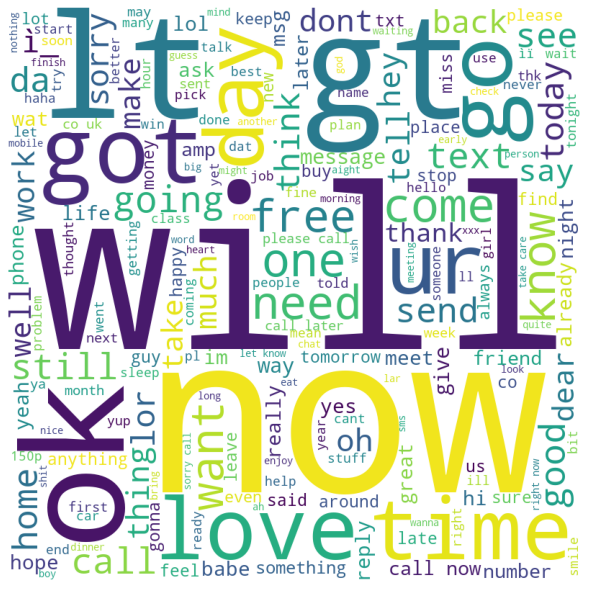

In [122]:
# Python program to generate WordCloud 


# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 

df=pd.read_csv('/content/spam.csv',encoding='latin-1',usecols=['v1','v2'])

comment_words = '' 
stopwords = set(STOPWORDS) 

# iterate through the csv file 
for val in df.v2: 
	
	# typecaste each val to string 
	val = str(val) 

	# split the value 
	tokens = val.split() 
	
	# Converts each token into lowercase 
	for i in range(len(tokens)): 
		tokens[i] = tokens[i].lower() 
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
				background_color ='white', 
				stopwords = stopwords, 
				min_font_size = 10).generate(comment_words) 

# plot the WordCloud image					 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 




---

---

---





